# Introduction

## Overview
In this notebook, I will delve into the HR dataset once again to explore the relationship between two key variables: **Total Working Years** and **Monthly Income**. Using a linear regression model, I aim to determine if there is a correlation between these variables and if the model can predict an employee's monthly income based on their total working years.

## Linear Regression Analysis
Linear regression is a statistical method used to model the relationship between a dependent variable (in this case, monthly income) and one or more independent variables (total working years). By fitting a linear equation to the data, we can understand the nature and strength of the relationship.

## Exploratory Data Analysis
To begin the analysis, I will first visualize the data through a scatter plot. This plot will help us gain insights into the potential correlation between total working years and monthly income. A visual examination of the data can often provide initial indications of trends.

# Data Preparation

## Importing Libraries
I'll start by importing the necessary libraries, including the scikit-learn library for linear regression and other tools for data manipulation and visualization.

## Loading the Dataset
I'll load the HR dataset, which contains information about employees. I was specifically interested in the 'MonthlyIncome' and 'TotalWorkingYears' columns for this analysis.

# Exploratory Data Analysis 

## Visualizing the Relationship
To better understand the relationship between 'TotalWorkingYears' and 'MonthlyIncome', I created a scatter plot. This plot will help identify any potential patterns or trends in the data.

# Data Splitting

## Creating Training and Testing Sets
Before building the model, I needed to split the data into training and testing sets. The training set will be used to train the linear regression model, while the testing set will be used to evaluate its performance.

# Model Building

## Linear Regression Model
Here I built a linear regression model using the training data. This model aims to predict an employees 'MonthlyIncome' based on their 'TotalWorkingYears'.

# Model Evaluation

## Assessing Performance
Using the testing set, I'll evaluate the performance of the linear regression model. One key metric that will be used is the Mean Squared Error, which quantifies how well the model's predictions match the actual values.

# Visualizing Predictions

## Scatter Plot with Predictions
To provide a visual representation of the model's performance, I have created a scatter plot. This plot will display both the true monthly incomes as blue dots and the predicted incomes by the model as a red line.

## Other Models
Here I wanted to utilise other models to see if these preform better than the Linear Regression Model. I used the Random Forest Model and the K Nearest Neighbour Model. 

# Conclusion

## Insights and Reflection
Through the linear regression analysis, I've gained insights into the correlation between total working years and monthly income. The model's predictions provide valuable information about how accurately it can estimate an employee's income based on their work experience.

## Future Considerations
This analysis opens the door to further exploration and potential improvements. Future steps might involve refining the model, considering additional variables, or applying different regression techniques to enhance predictive accuracy.

By completing this analysis, I aim to contribute to a better understanding of employee compensation and the factors that influence it within the business.

---


## Data Preparation:
---

### Import the packages to be used:

In [44]:
#Data Frames
import pandas as pd

#Main Statical package
import scipy.stats as stats

#Used for plotting
import matplotlib.pyplot as plt

#Enhanced version for plotting
import seaborn as sns

#Numberical arrays
import numpy as np

#Formating into pretty tables
from tabulate import tabulate

#To create the Linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit


#To create Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#TO Create K Nearest Neighbour KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [45]:
#Load the HR data from an Excel file into a DataFrame
file_path = r'C:\Users\35385\Desktop\Machine Learning & Stats\HR_Data_2022.xlsx'
data = pd.read_excel(file_path)

#Print the column names
print("Column Names:", data.columns)

Column Names: Index(['Age', 'Department', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [46]:
#Creating my New Dataframe to work with just these two columns
selected_Columns = ['MonthlyIncome', 'TotalWorkingYears']
new_DF = data[selected_Columns]

# Display the new DataFrame
print(new_DF)


    MonthlyIncome  TotalWorkingYears
0            5993                  8
1            5130                 10
2            2090                  7
3            2909                  8
4            3468                  6
..            ...                ...
95          13549                 16
96           4999                  4
97           4221                  5
98          13872                 38
99           2042                 17

[100 rows x 2 columns]


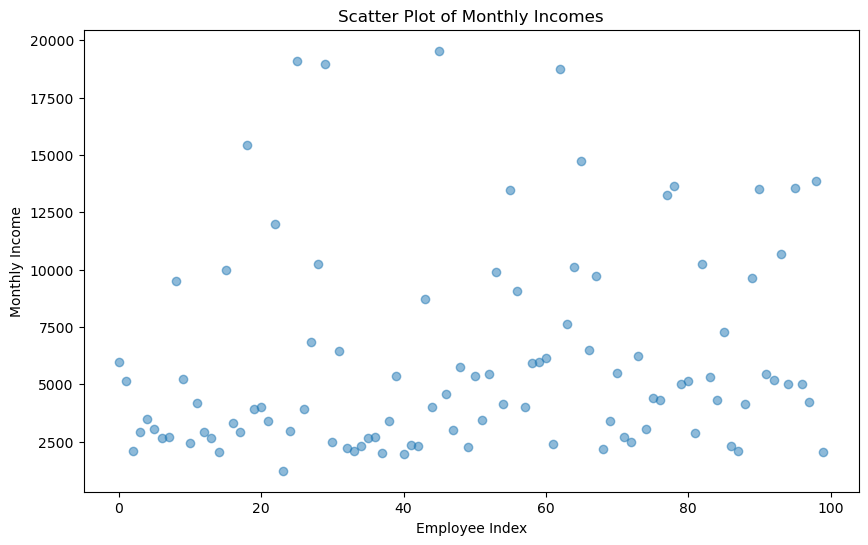

In [47]:
#Creating a plot to visualise my Income Data
monthly_Incomes = new_DF['MonthlyIncome']

#Create the scatter plot with all the attributes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(monthly_Incomes)), monthly_Incomes, alpha=0.5)
plt.xlabel('Employee Index')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Monthly Incomes')
plt.show()


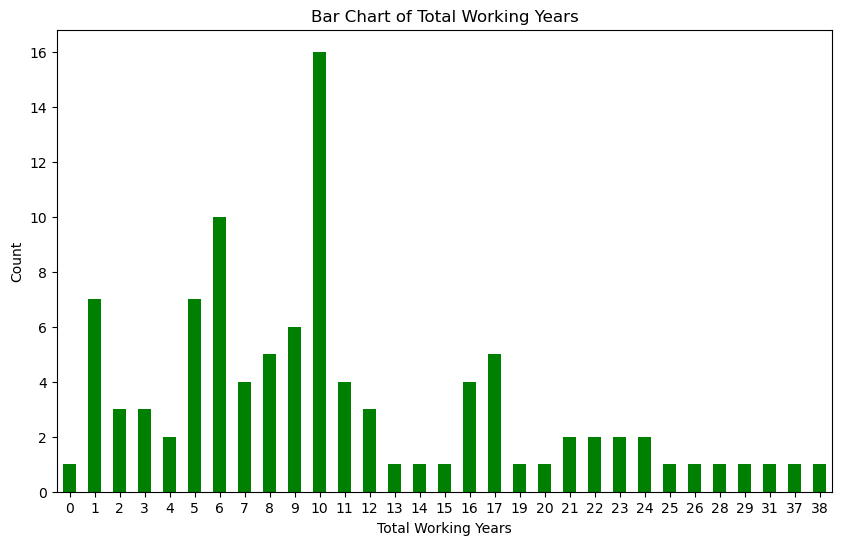

In [48]:
#Creating a visualisation of the total working years data
total_Working_Years = new_DF['TotalWorkingYears']

# Count the occurrences of each total working years value
working_Years_Counts = total_Working_Years.value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
working_Years_Counts.plot(kind='bar', color="green")
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.title('Bar Chart of Total Working Years')
plt.xticks(rotation=0)
plt.show()


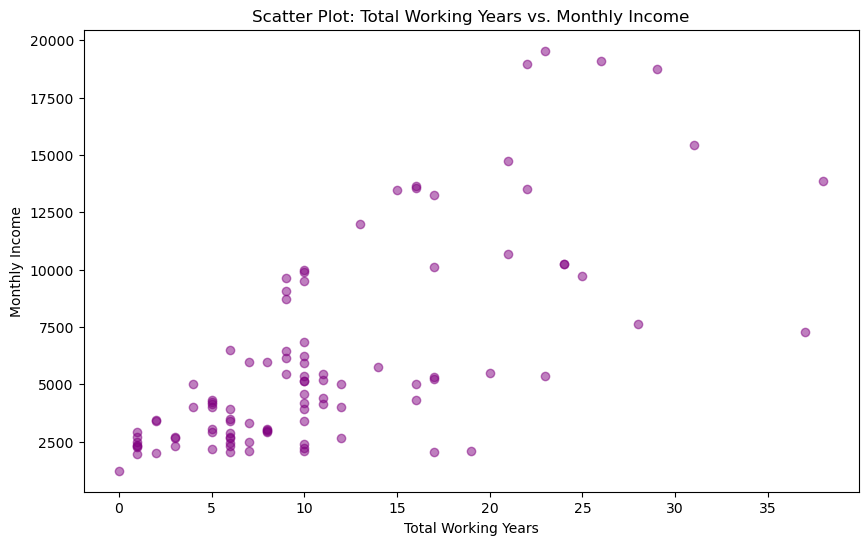

In [49]:
#Exploratory Data Analysis to understand the relationship between my two variables Total Working Years and Monthly Income. 
total_Working_Years = new_DF['TotalWorkingYears']
monthly_Income = new_DF['MonthlyIncome']

#Showing the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_Working_Years, monthly_Income, alpha=0.5, color="purple")
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot: Total Working Years vs. Monthly Income')
plt.show()


## Creating my Training and Test Sets
---

Data splitting is an important step in building predictive models. It involves dividing the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. To achieve this I used the scikit-learn library and can be seen below: 

In [50]:
#Creating my training and testing sets
#X is my independent variable and y is my dependent variable. 
x = new_DF[['TotalWorkingYears']]  
y = new_DF['MonthlyIncome']        

#size is 20% of the data is sent to testing and spliting into training and test sets. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Printing the shapes of the resulting datasets.
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (80, 1)
x_test shape: (20, 1)
y_train shape: (80,)
y_test shape: (20,)


In [51]:
#View some of my training set
x_train.head()

,TotalWorkingYears
55,15
88,11
26,10
42,1
69,2


In [52]:
#View some of my training set
y_test.head()

83     5329
53     9884
70     5473
45    19545
44     4011
Name: MonthlyIncome, dtype: int64

In [53]:
#View indices of train array.
x_train.index

Int64Index([55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28, 93,  5, 66,
            65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,  3, 17, 38,
             8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79,
            41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1, 52, 21,  2,
            23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51],
           dtype='int64')

In [54]:
#Double checking size of training data.
x_train.index.size

80

In [55]:
#Now for the test data.
x_test.head()

,TotalWorkingYears
83,17
53,10
70,20
45,23
44,12


In [56]:
#Showing some of the test data.
y_test.head()

83     5329
53     9884
70     5473
45    19545
44     4011
Name: MonthlyIncome, dtype: int64

In [57]:
#Checking the size of test data.
x_test.index.size

20

All verified that the model took 80/20 split as desired. Next, I plotted the test/train data to show the data was seperated evenly throughout the dataset.

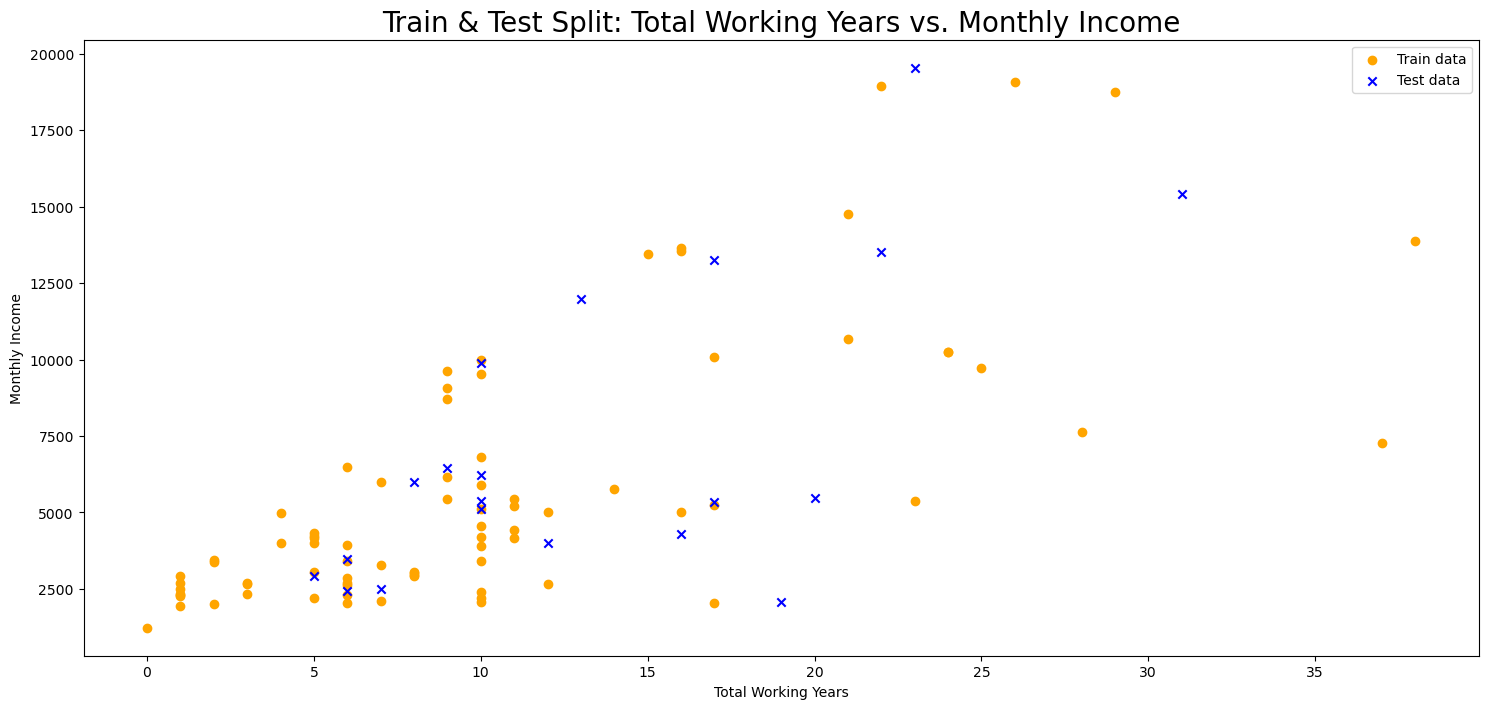

In [58]:
#Creating the figure & axis
fig, ax = plt.subplots(figsize=(18, 8))

#A Scatter plots for training data
ax.scatter(x_train, y_train, marker='o', color='orange', label='Train data')

#A Scatter plot for testing data
ax.scatter(x_test, y_test, marker='x', color='blue', label='Test data')

#Setting the Plot title
ax.set_title('Train & Test Split: Total Working Years vs. Monthly Income', fontsize=20)

#Setting X-axis label
ax.set_xlabel('Total Working Years')

#Setting the Y-axis label
ax.set_ylabel('Monthly Income')

#Show the legend
ax.legend()

#Asking the plot to be shown.
plt.show()

## Linear Regression Model
---

Now that I have the data split into training and testing sets: 

- X_train contains 80 samples and 1 feature (total working years).
- X_test contains 20 samples and 1 feature (total working years).
- y_train contains 80 samples (corresponding monthly incomes).
- y_test contains 20 samples (corresponding monthly incomes).


The next steps involve building and training a linear regression model using the training data, and then evaluating its performance on the testing data. 

In [59]:
#Creating the linear regression model
model = LinearRegression()

#Training the model on the training data
model.fit(x_train, y_train)

#Using the trained model to make predictions on the testing data
y_pred = model.predict(x_test)

#Calculating the Mean Squared Error to evaluate the models performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 13619975.70503221


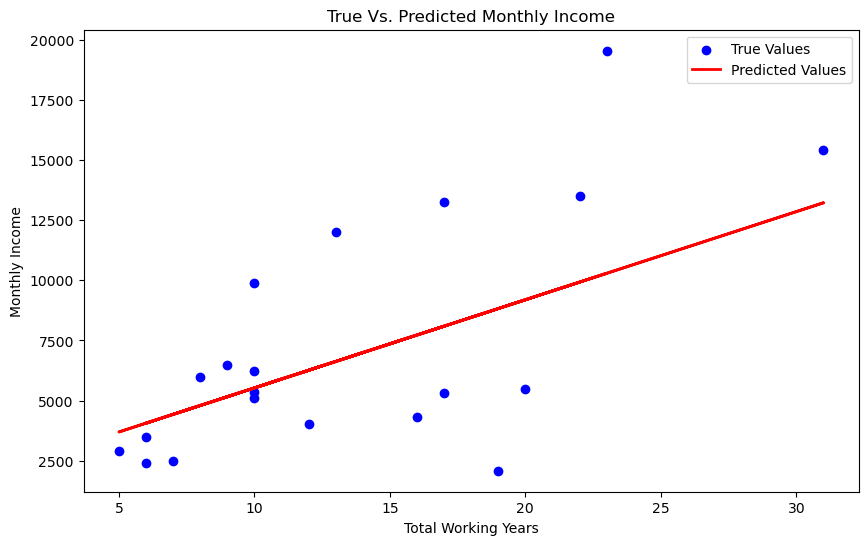

In [60]:
#Showing the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='True Values')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('True Vs. Predicted Monthly Income')
plt.legend()
plt.show()

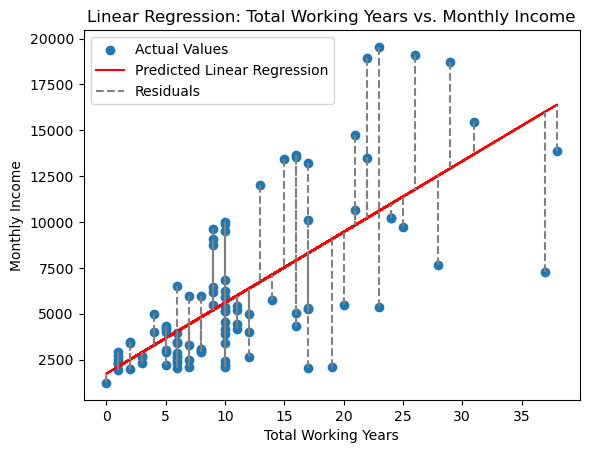

In [61]:
#Another complex look at the Total Working Years V Monthly income
X = data['TotalWorkingYears'].values
y = data['MonthlyIncome'].values
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), y)
#Ploting the actual data input and output
plt.scatter(X, y, label="Actual Values")

#Ploting the linear regression predictions in a straight line
plt.plot(X, reg.predict(X.reshape(-1, 1)), color="r", label="Predicted Linear Regression")

#Ploting first residual
plt.plot([X[0], X[0]], [y[0], reg.predict(X.reshape(-1, 1))[0]], color="grey", linestyle='dashed', label="Residuals")

#For loop to plot all remaining residuals
for i in range(1, len(X)):
    plt.plot([X[i], X[i]], [y[i], reg.predict(X.reshape(-1, 1))[i]], color="grey", linestyle='dashed')

#Legend add
plt.legend()

#Adding the labels and title
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Linear Regression: Total Working Years vs. Monthly Income')

#Display the plot
plt.show()

The scatter plot shows the true monthly incomes in blue dots and the predicted monthly incomes by the model is shown by the red line. This gives a visual sense of how well the model predictions look against the actual values. Additionally, the Mean Squared Error will provide a quantitative measure of the model's performance. The lower the Mean Squared Error the better predictive performance.

Regression models serve the purpose of quantifying the connection between one or multiple predictor variables and a response variable. When we employ a regression model, our objective is to comprehend the model's effectiveness in utilising predictor variable values to forecast the response variable value. Two commonly employed metrics for checking the adequacy of a models fit to a dataset are the Mean Squared Error and the Root Mean Squared Error:

**Mean Squared Error V Root Mean Squared Error**

MSE: A metric that tells us the average squared difference between the predicted values and the actual values in a dataset. The lower the MSE, the better a model fits a dataset.

RMSE: A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset (Statology,2021).

In [62]:
#Making predictions using the trained model
y_pred = model.predict(x_test)

#Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

#Calculating the Root Mean Squared Error
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 3690.525125918019


As mentioned before a lower Root Mean Squared Error indicates that the model's predictions are closer to the actual values.

In this case, a Root Mean Squared Error of approximately 3690 suggests that, on average, the predicted monthly incomes differ from the actual monthly incomes by around $3690. This value provides a useful measure of the models performance and helps us to understand how well the model is capturing the relationship between 'TotalWorkingYears' and 'MonthlyIncome'. On the other hand, we need to consider the whole data set and its entirety. 

As we got a high Mean Squared Error and a high Root Mean Squared Error, this might suggest that the models predictions are far from the actual values. In the context, this might indicate that the current linear regression model might not be accurately capturing the relationship between 'TotalWorkingYears' and 'MonthlyIncome'. So I will continue trying to analysis my dataset and try fit to the model, otherwise I might have to look at other Machine Learning Models.

In [63]:
#Fitting the model 
model = LinearRegression()

#Fitting the model on the training data
model.fit(x_train, y_train)


LinearRegression()

As my data points clearly do not fit a linear regression ie a straight line through all data points, I believe a polynomial regression may fit my model better. Polynomial regression is similar to linear regression and uses the relationship between the variables x and y to find the best way to draw a line through the data points.

Mean Squared Error (Polynomial Regression): 13774674.99331366


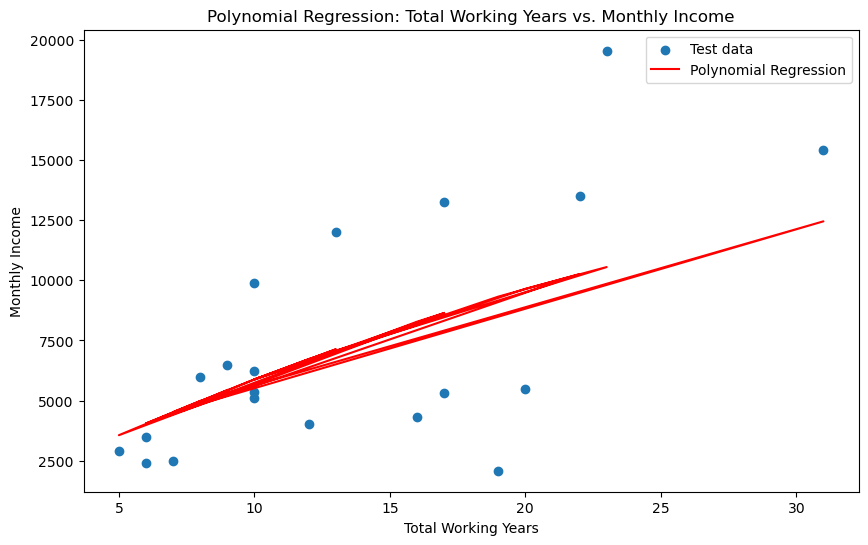

In [64]:
#Picking the degree of the polynomiaL
degree = 2

#Performing the polynomial regression
coefficients = np.polyfit(x_train.squeeze(), y_train, degree)

#Creating a polynomial function using the coefficients
poly_func = np.poly1d(coefficients)

#Predicting utilising the polynomial function
y_pred = poly_func(x_test.squeeze())

#Calculating the MSE to evaluate the model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (Polynomial Regression):", mse)

#Creating a scatter plot of data points and the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label='Test data')
plt.plot(x_test, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Polynomial Regression: Total Working Years vs. Monthly Income')
plt.legend()
plt.show()


This is also a high number of 13774674, backing up the hypothesis that this model also is not capturing the relationship between 'TotalWorkingYears' and 'MonthlyIncome' effectively. This could be due to
1. The relationship between the variables might not be adequately captured by a linear or polynomial model due to its non-linearity.
2. It maybe because its missing other features that may influence the income. 
3. Outliers - we must always consider outliers as this might be skewing the data.
4. Noise in the data could be obscuring the true relationship.

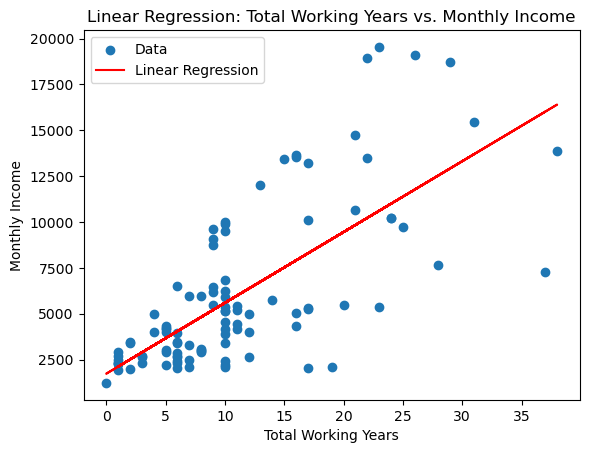

Mean Squared Error: 9589429.894155867


In [65]:
#Using Scipy packages to show Linear Regression
X = data['TotalWorkingYears']
y = data['MonthlyIncome']

#Define the linear regression function
def linear_func(x, a, b):
    return a * x + b

#Fitting the model to the data
params, covariance = curve_fit(linear_func, X, y)

#Extracting the coefficients
a, b = params

#Making the important predictions
y_pred = linear_func(X, a, b)

#Plotting the data and the linear regression line
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Linear Regression: Total Working Years vs. Monthly Income')
plt.legend()
plt.show()

#Calculating Mean Squared Error
mse = np.mean((y_pred - y) ** 2)
print("Mean Squared Error:", mse)


Again, while using a different package - the MSE stayed quite high suggesting again that the model is not connecting the two data fields. So an alternative I thought might help would be that if I used the annual salary rather than the monthly income to see if this would have any difference. I re-ran the plots again with my newly updated column 'Salary'.

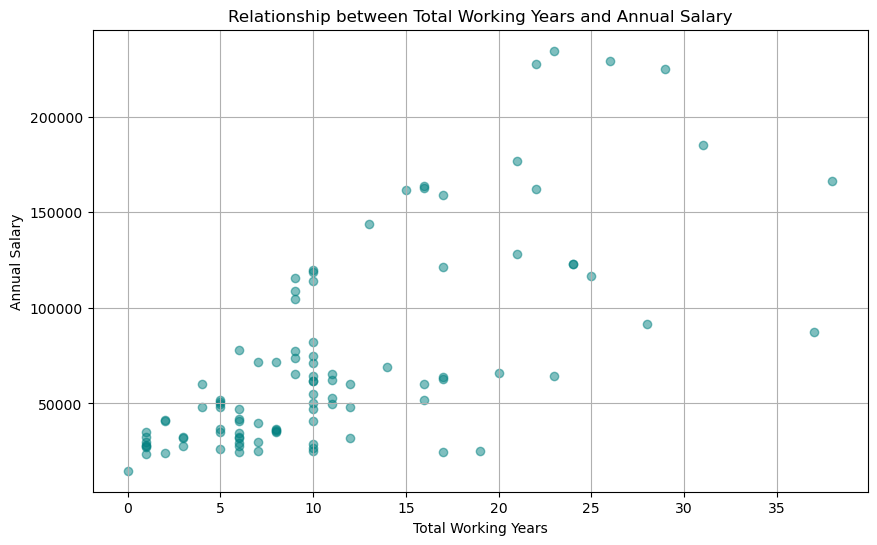

In [66]:
#Converting Monthly Income to Annual Salary
data['AnnualSalary'] = data['MonthlyIncome'] * 12

#Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['TotalWorkingYears'], data['AnnualSalary'], alpha=0.5, color="teal")
plt.xlabel('Total Working Years')
plt.ylabel('Annual Salary')
plt.title('Relationship between Total Working Years and Annual Salary')
plt.grid(True)
plt.show()


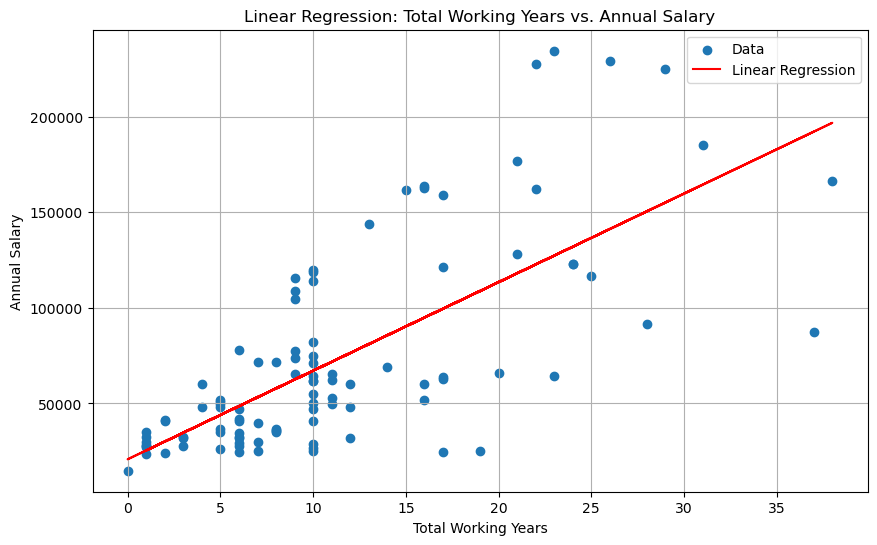

Mean Squared Error: 1380877904.7584455


In [67]:
#Converting the Monthly Income to Annual Salary
data['AnnualSalary'] = data['MonthlyIncome'] * 12

#Using Scipy packages to show Linear Regression
X = data['TotalWorkingYears']
y = data['AnnualSalary']  # Use the converted AnnualSalary column

#Linear regression function
def linear_func(x, a, b):
    return a * x + b

#Fitting the model to the data
params, covariance = curve_fit(linear_func, X, y)

#Extracting the coefficients
a, b = params

#Making the important predictions
y_pred = linear_func(X, a, b)

#Plotting the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Total Working Years')
plt.ylabel('Annual Salary')
plt.title('Linear Regression: Total Working Years vs. Annual Salary')
plt.legend()
plt.grid(True)
plt.show()

#Calculating Mean Squared Error
mse = np.mean((y_pred - y) ** 2)
print("Mean Squared Error:", mse)


Once again, the Mean Squared Error was higher than the previous Monthly Salary noting a strained relationship between the model and the two data fields.

## Other Models:
---


### Random Forest Regression

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 2680091374.419929


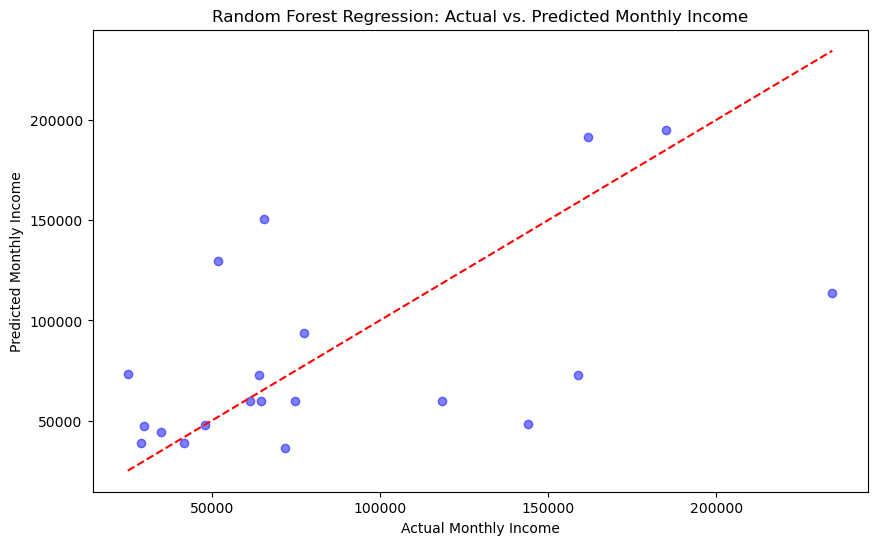

In [69]:
#Visualising the results
plt.figure(figsize=(10, 6))

#Scatter plot of Actual V Predicted Values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Random Forest Regression: Actual vs. Predicted Monthly Income")
plt.show()


The Mean Squared Error value of 13,619,975.71 that I obtained from the initial linear regression model is significantly lower than the MSE value of 2,680,091,374.42 from the Random Forest model. This suggests that the initial linear regression model is performing better in terms of prediction accuracy compared to the Random Forest model on your dataset.

When comparing the MSE values, a lower MSE indicates better model performance. Therefore, based on the MSE values, the initial linear regression model seems to be a more suitable choice for predicting the relationship between total working years and monthly income in the dataset.

### K-nearest neighbors (KNN)


Mean Squared Error: 15556165.104000002


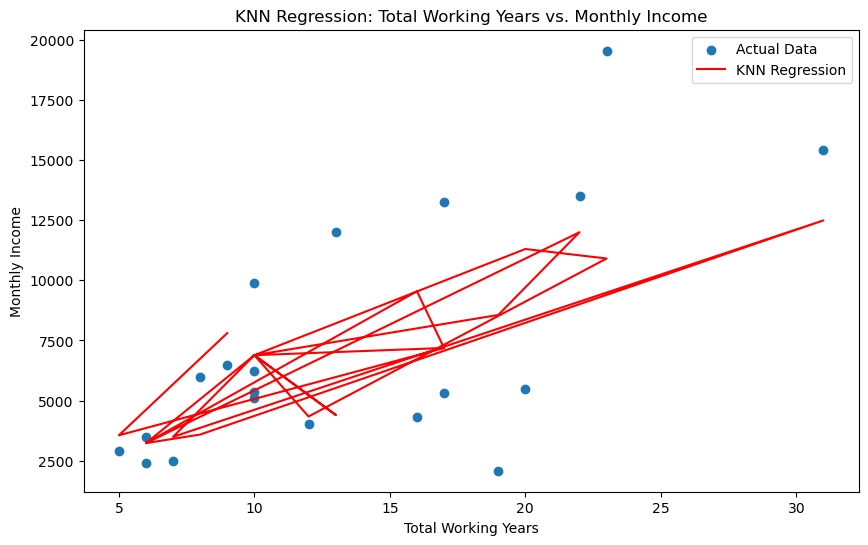

In [70]:
#Setting up the coloumns for KNN
X = data[['TotalWorkingYears']]
y = data['MonthlyIncome']

#Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardise the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Calling the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

#Fitting the model to the training data
knn_regressor.fit(X_train_scaled, y_train)

#Making the predictions on the test data
y_pred = knn_regressor.predict(X_test_scaled)

#Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='KNN Regression')
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('KNN Regression: Total Working Years vs. Monthly Income')
plt.legend()
plt.show()


Even with the third model, it seems the Linear Regression Model is preforming better that the Random Forest and the k-Nearest Neighbors (KNN). As this is real data and like people it is not as linear as we wish it to be. In an ideal world we would like it to be that the longer you worked or your career evolved - the fact that your renumeration or compensation would increase with your experience. However this is rearly seen in the organisation as its proven that if an employees stay within the organisation they have less salary than those who have moved between jobs. Can be seen here: https://ivyexec.com/career-advice/2023/does-job-hopping-really-earn-you-a-higher-salary, https://www.forbes.com/sites/jackkelly/2019/07/26/a-new-study-concludes-that-it-literally-pays-to-switch-jobs-right-now/

# Machine Learning References

## Linear Regression
- [W3Schools - Python Linear Regression](https://www.w3schools.com/python/python_ml_linear_regression.asp)

## Root Mean Square Error (RMSE)
- [O'Reilly - RMSE Explanation](https://www.oreilly.com/library/view/machine-learning-with/9781785889936/669125cc-ce5c-4507-a28e-065ebfda8f86.xhtml#:~:text=RMSE%20is%20the%20square%20root,penalizes%20larger%20errors%20more%20severely.)
- [Statology - MSE vs RMSE](https://www.statology.org/mse-vs-rmse/)

## Polynomial Regression
- [Wikipedia - Polynomial Regression](https://en.wikipedia.org/wiki/Polynomial_regression)
- [W3Schools - Python Polynomial Regression](https://www.w3schools.com/python/python_ml_polynomial_regression.asp)

## K-Nearest Neighbors (KNN)
- [W3Schools - Python KNN](https://www.w3schools.com/python/python_ml_knn.asp)
- [Wikipedia - K-Nearest Neighbors Algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Towards Data Science - KNN Basics](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- [scikit-learn - Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html)

## Random Forest Regression
- [Towards Data Science - Random Forest Regression](https://towardsdatascience.com/random-forest-regression-5f605132d19d)
- [scikit-learn - RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [Level Up - Random Forest Regression](https://levelup.gitconnected.com/random-forest-regression-209c0f354c84)
